<a href="https://colab.research.google.com/github/Vishwaschole/Cardiovascular-Risk-Prediction/blob/main/Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients’ information. It includes over 3390 records and 15 attributes.


# **Variables**
Each attribute is a potential risk factor. There are both demographic behavioral, and medical risk factors.


# **Data Description**
Demographic:


*   Sex: male or female("M" or "F")
*   Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous) Behavioral
*   Is_smoking: whether or not the patient is a current smoker ("YES" or "NO")
*   Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.) Medical( history)
*   BP Meds: whether or not the patient was on blood pressure medication (Nominal)
*   Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
*   Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
*   Diabetes: whether or not the patient had diabetes (Nominal)
Medical(current)
*   Tot Chol: total cholesterol level (Continuous)
*   Sys BP: systolic blood pressure (Continuous)
*   Dia BP: diastolic blood pressure (Continuous)
*   BMI: Body Mass Index (Continuous)
*   Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in
fact discrete, yet are considered continuous because of large number of possible values.)
*   Glucose: glucose level (Continuous)
Predict variable (desired target)
*   **10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) - DV**





#**Loading and Exploring Data**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
df=pd.read_csv('/content/drive/MyDrive/Copy of data_cardiovascular_risk.csv')

In [8]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [9]:
df.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [10]:
df.shape

(3390, 17)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [12]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,3390,NaN,NaN,NaN,1694.5,978.753,0,847.25,1694.5,2541.75,3389
age,3390,NaN,NaN,NaN,49.5422,8.59288,32,42,49,56,70
education,3303,NaN,NaN,NaN,1.97094,1.01908,1,1,2,3,4
sex,3390,2,F,1923,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_smoking,3390,2,NO,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cigsPerDay,3368,NaN,NaN,NaN,9.06948,11.8791,0,0,0,20,70
BPMeds,3346,NaN,NaN,NaN,0.0298864,0.170299,0,0,0,0,1
prevalentStroke,3390,NaN,NaN,NaN,0.00648968,0.0803085,0,0,0,0,1
prevalentHyp,3390,NaN,NaN,NaN,0.315339,0.464719,0,0,0,1,1
diabetes,3390,NaN,NaN,NaN,0.0256637,0.158153,0,0,0,0,1


Checking For duplication of Data.

In [13]:
df[df.duplicated()]

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


#<b> Handling Missing Values



Checking for Missing Values

In [14]:
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [15]:
# Before Altering the Data copying orinal data
df_copy=df.copy()

**Hear total Missing data was less than 13% insted of delecting data we replacing missing values with approxmate values**

In [16]:
# Missing Value Count Function
def show_missing():
    missing = df_copy.columns[df_copy.isnull().any()].tolist()
    return missing

# Missing data counts and percentage
print('Missing Data Count')
print(df_copy[show_missing()].isnull().sum().sort_values(ascending = False))
print('--'*50)
print('Missing Data Percentage')
print(round(df_copy[show_missing()].isnull().sum().sort_values(ascending = False)/len(df_copy)*100,2))

Missing Data Count
glucose       304
education      87
BPMeds         44
totChol        38
cigsPerDay     22
BMI            14
heartRate       1
dtype: int64
----------------------------------------------------------------------------------------------------
Missing Data Percentage
glucose       8.97
education     2.57
BPMeds        1.30
totChol       1.12
cigsPerDay    0.65
BMI           0.41
heartRate     0.03
dtype: float64


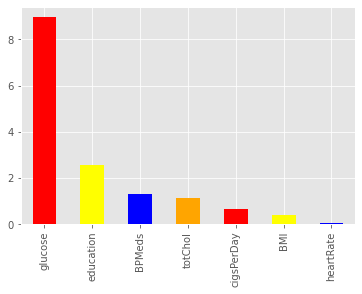

In [17]:
round(df_copy[show_missing()].isnull().sum().sort_values(ascending = False)/len(df_copy)*100,2).plot(kind='bar', color=['red', 'yellow', 'blue', 'orange'])


**Glucose**

In the following column mean and median are nearby. we have fill the missing values so i am using median values for filling the missing values.

In [18]:
df['glucose'].describe()

count    3086.000000
mean       82.086520
std        24.244753
min        40.000000
25%        71.000000
50%        78.000000
75%        87.000000
max       394.000000
Name: glucose, dtype: float64

In [19]:
print('Glucose Feature Missing Before')
print(df_copy[['glucose']].isnull().sum())
print('--'*50)
df_copy['glucose']=df_copy['glucose'].fillna(df['glucose'].median())
print('Glucose Feature Missing After')
print(df_copy[['glucose']].isnull().sum())
print('--'*50)

Glucose Feature Missing Before
glucose    304
dtype: int64
----------------------------------------------------------------------------------------------------
Glucose Feature Missing After
glucose    0
dtype: int64
----------------------------------------------------------------------------------------------------


**Education**

In [20]:
df['education'].describe()

count    3303.000000
mean        1.970936
std         1.019081
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         4.000000
Name: education, dtype: float64

In [21]:
df['education'].unique()

array([ 2.,  4.,  1.,  3., nan])

Education feature is not a continues variable so we using Mode for filling the missing values.

In [22]:
print('Education Feature Missing Before')
print(df_copy[['education']].isnull().sum())
print('--'*50)
df_copy['education']=df_copy['education'].fillna(df['education'].mode()[0])
print('Education Feature Missing After')
print(df_copy[['education']].isnull().sum())
print('--'*50)

Education Feature Missing Before
education    87
dtype: int64
----------------------------------------------------------------------------------------------------
Education Feature Missing After
education    0
dtype: int64
----------------------------------------------------------------------------------------------------


**BPMeds**

In [23]:
df['BPMeds'].describe()

count    3346.000000
mean        0.029886
std         0.170299
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: BPMeds, dtype: float64

In [24]:
df['BPMeds'].unique()

array([ 0., nan,  1.])

In [25]:
print('BPMeds Feature Missing Before')
print(df_copy[['BPMeds']].isnull().sum())
print('--'*50)
df_copy['BPMeds']=df_copy['BPMeds'].fillna(df['BPMeds'].mode()[0])
print('BPMeds Feature Missing After')
print(df_copy[['BPMeds']].isnull().sum())
print('--'*50)

BPMeds Feature Missing Before
BPMeds    44
dtype: int64
----------------------------------------------------------------------------------------------------
BPMeds Feature Missing After
BPMeds    0
dtype: int64
----------------------------------------------------------------------------------------------------


Total Cholostral

In [26]:
df['totChol'].describe()

count    3352.000000
mean      237.074284
std        45.247430
min       107.000000
25%       206.000000
50%       234.000000
75%       264.000000
max       696.000000
Name: totChol, dtype: float64

In [27]:
print('Total colostrol Feature Missing Before')
print(df_copy[['totChol']].isnull().sum())
print('--'*50)
df_copy['totChol']=df_copy['totChol'].fillna(df['totChol'].median())
print('Total colostrol Feature Missing After')
print(df_copy[['totChol']].isnull().sum())
print('--'*50)

Total colostrol Feature Missing Before
totChol    38
dtype: int64
----------------------------------------------------------------------------------------------------
Total colostrol Feature Missing After
totChol    0
dtype: int64
----------------------------------------------------------------------------------------------------


**Cigrates per Day**

In [28]:
df['cigsPerDay'].describe()

count    3368.000000
mean        9.069477
std        11.879078
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max        70.000000
Name: cigsPerDay, dtype: float64

In [29]:
print('Cigars per day Feature Missing Before')
print(df_copy[['cigsPerDay']].isnull().sum())
print('--'*50)
df_copy['cigsPerDay']=df_copy['cigsPerDay'].fillna(df['cigsPerDay'].median())
print('Cigars per day Feature Missing After')
print(df_copy[['cigsPerDay']].isnull().sum())
print('--'*50)

Cigars per day Feature Missing Before
cigsPerDay    22
dtype: int64
----------------------------------------------------------------------------------------------------
Cigars per day Feature Missing After
cigsPerDay    0
dtype: int64
----------------------------------------------------------------------------------------------------


**Body Mass Index(BMI)**

In [30]:
df['BMI'].describe()

count    3376.000000
mean       25.794964
std         4.115449
min        15.960000
25%        23.020000
50%        25.380000
75%        28.040000
max        56.800000
Name: BMI, dtype: float64

In [31]:
print('BMI Feature Missing Before')
print(df_copy[['BMI']].isnull().sum())
print('--'*50)
df_copy['BMI']=df_copy['BMI'].fillna(df['BMI'].median())
print('BMI Feature Missing After')
print(df_copy[['BMI']].isnull().sum())
print('--'*50)

BMI Feature Missing Before
BMI    14
dtype: int64
----------------------------------------------------------------------------------------------------
BMI Feature Missing After
BMI    0
dtype: int64
----------------------------------------------------------------------------------------------------


Heart Rate

In [32]:
df['heartRate'].describe()

count    3389.000000
mean       75.977279
std        11.971868
min        45.000000
25%        68.000000
50%        75.000000
75%        83.000000
max       143.000000
Name: heartRate, dtype: float64

In [33]:
print('Heart Rate Feature Missing Before')
print(df_copy[['heartRate']].isnull().sum())
print('--'*50)
df_copy['heartRate']=df_copy['heartRate'].fillna(df['heartRate'].median())
print('Heart Rate Feature Missing After')
print(df_copy[['heartRate']].isnull().sum())
print('--'*50)

Heart Rate Feature Missing Before
heartRate    1
dtype: int64
----------------------------------------------------------------------------------------------------
Heart Rate Feature Missing After
heartRate    0
dtype: int64
----------------------------------------------------------------------------------------------------


#<b> EDA 

###**Age**

Data contains people of age from 32-70 years. People are effected to cardivasucular Desises from 35 

Text(0.5, 1.0, 'Age Distrubution')

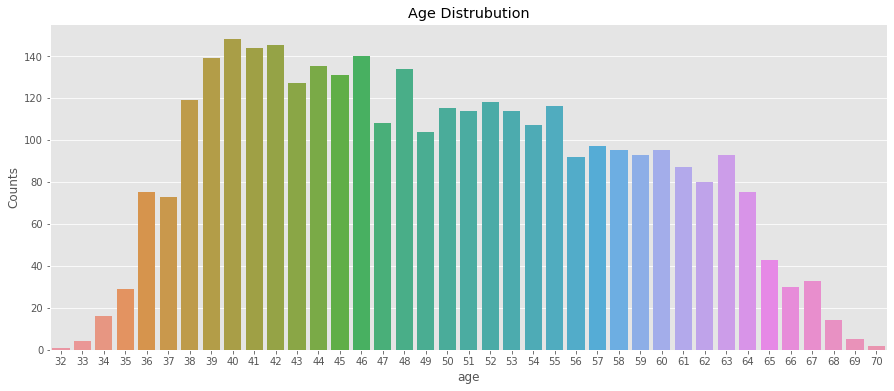

In [34]:
fig, ax = plt.subplots(figsize=(15,6))
age_dis=pd.DataFrame(df.groupby(['age'])['id'].count())
sns.barplot(x=age_dis.index,y=age_dis['id'])
plt.ylabel('Counts')
plt.title('Age Distrubution')

Text(0.5, 1.0, 'Age wise Effected People')

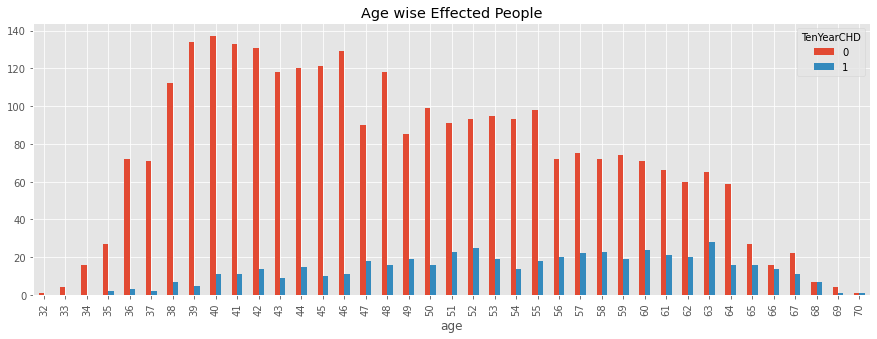

In [35]:
plt.rcParams['figure.figsize'] = (15, 5)
df.groupby(['age','TenYearCHD'])['id'].count().unstack().plot(kind='bar')
plt.title('Age wise Effected People')

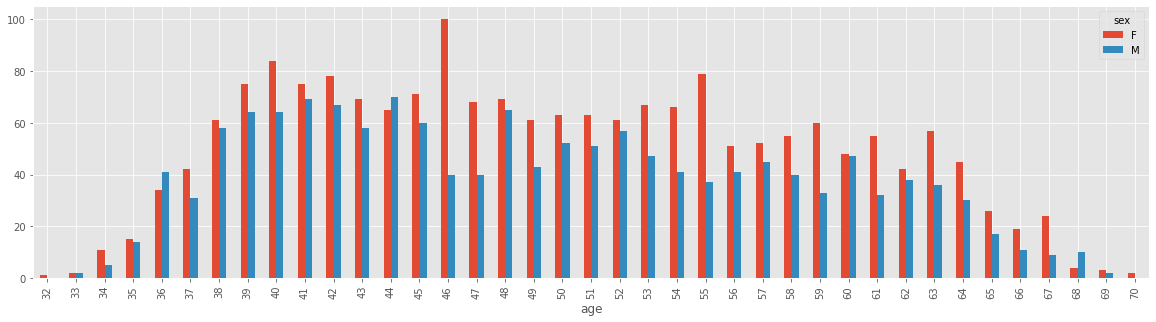

In [36]:
plt.rcParams['figure.figsize'] = (20, 5)
df.groupby(['age','sex'])['TenYearCHD'].count().unstack().plot(kind='bar')

###**Education**

In [37]:
df['education'].unique()

array([ 2.,  4.,  1.,  3., nan])

In [38]:
df.groupby(['education'])['id'].count()

education
1.0    1391
2.0     990
3.0     549
4.0     373
Name: id, dtype: int64

Text(0.5, 1.0, 'Education Proposanate')

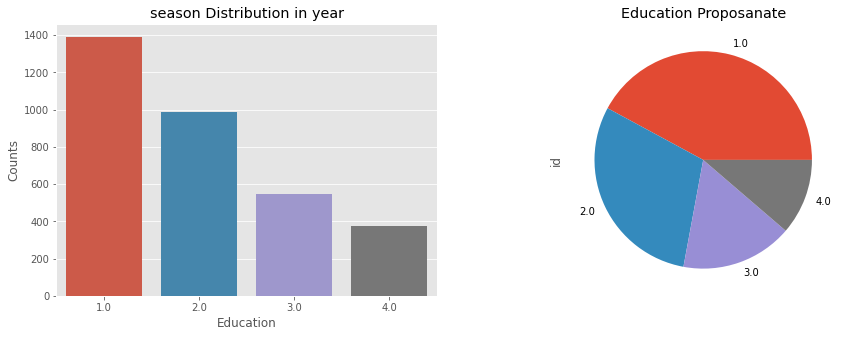

In [39]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
ax1=plt.subplot(1,2,1)
Education_status=pd.DataFrame(df.groupby(['education'])['id'].count())
sns.barplot(x=Education_status.index,y=Education_status['id'])
plt.xlabel('Education')
plt.ylabel('Counts')
plt.title('season Distribution in year')
ax2=plt.subplot(1,2,2)
df.groupby(['education'])['id'].count().plot(kind='pie')
plt.title('Education Proposanate')

Text(0.5, 1.0, 'Education with Ten years CHD')

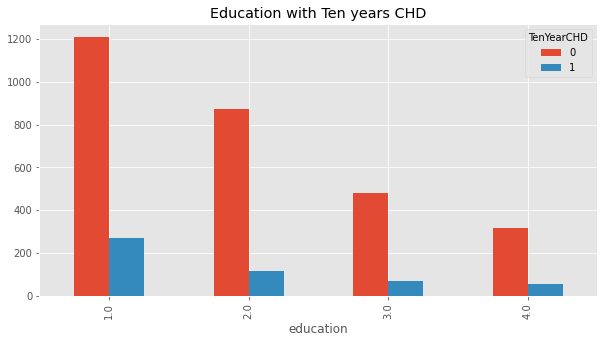

In [40]:
plt.rcParams['figure.figsize'] = (10, 5)
df_copy.groupby(['education','TenYearCHD'])['id'].count().unstack().plot(kind='bar')
plt.title('Education with Ten years CHD')

###**SEX**

In [41]:
df.groupby(['sex'])['id'].count()

sex
F    1923
M    1467
Name: id, dtype: int64

Text(0.5, 1.0, 'sex ratio Proposanate')

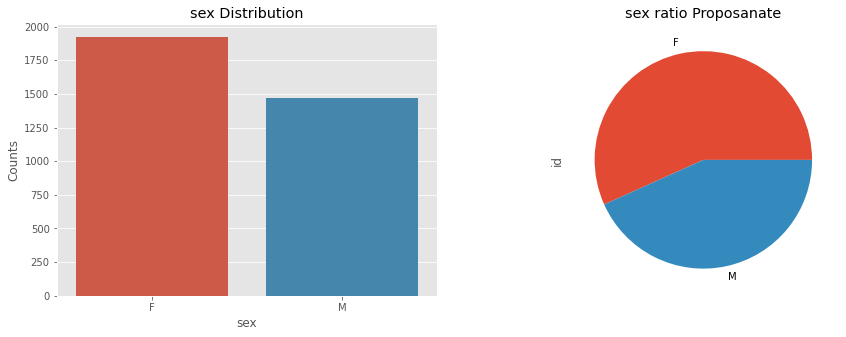

In [42]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
ax1=plt.subplot(1,2,1)
Education_status=pd.DataFrame(df.groupby(['sex'])['id'].count())
sns.barplot(x=Education_status.index,y=Education_status['id'])
plt.xlabel('sex')
plt.ylabel('Counts')
plt.title('sex Distribution')
ax2=plt.subplot(1,2,2)
df.groupby(['sex'])['id'].count().plot(kind='pie')
plt.title('sex ratio Proposanate')

Text(0.5, 1.0, 'Sex distribution with Ten years CHD')

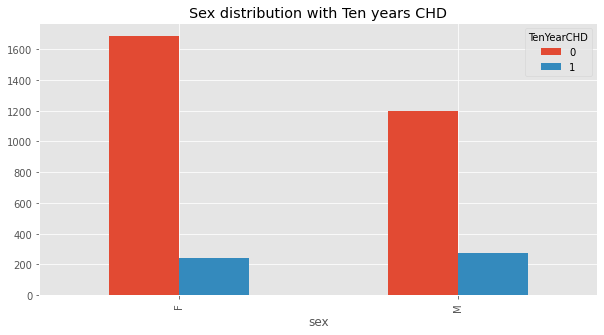

In [43]:
plt.rcParams['figure.figsize'] = (10, 5)
df_copy.groupby(['sex','TenYearCHD'])['id'].count().unstack().plot(kind='bar')
plt.title('Sex distribution with Ten years CHD')

###**Smoking Data**

In [44]:
df.groupby(['is_smoking'])['id'].count()

is_smoking
NO     1703
YES    1687
Name: id, dtype: int64

Text(0.5, 1.0, 'Smoking persons Proposanate')

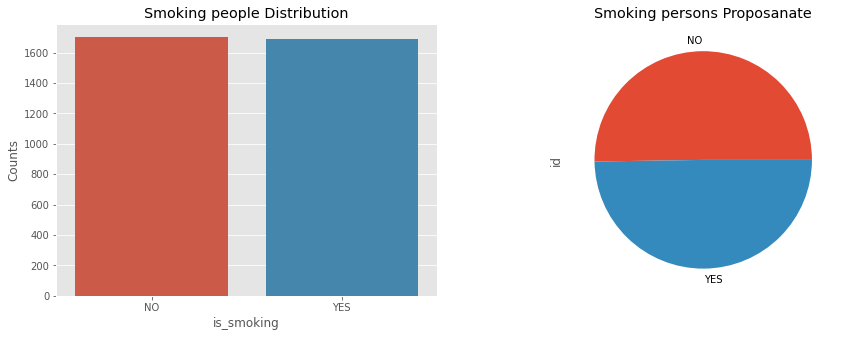

In [45]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
ax1=plt.subplot(1,2,1)
Education_status=pd.DataFrame(df.groupby(['is_smoking'])['id'].count())
sns.barplot(x=Education_status.index,y=Education_status['id'])
plt.xlabel('is_smoking')
plt.ylabel('Counts')
plt.title('Smoking people Distribution')
ax2=plt.subplot(1,2,2)
df.groupby(['is_smoking'])['id'].count().plot(kind='pie')
plt.title('Smoking persons Proposanate')

Text(0.5, 1.0, 'Smoking people distribution with Ten years CHD')

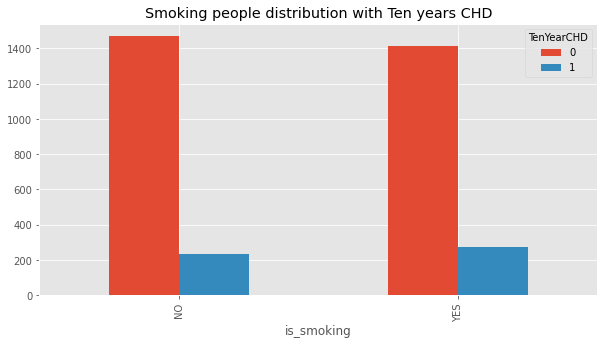

In [46]:
plt.rcParams['figure.figsize'] = (10, 5)
df_copy.groupby(['is_smoking','TenYearCHD'])['id'].count().unstack().plot(kind='bar')
plt.title('Smoking people distribution with Ten years CHD')

Text(0.5, 1.0, 'Age wise smoking people')

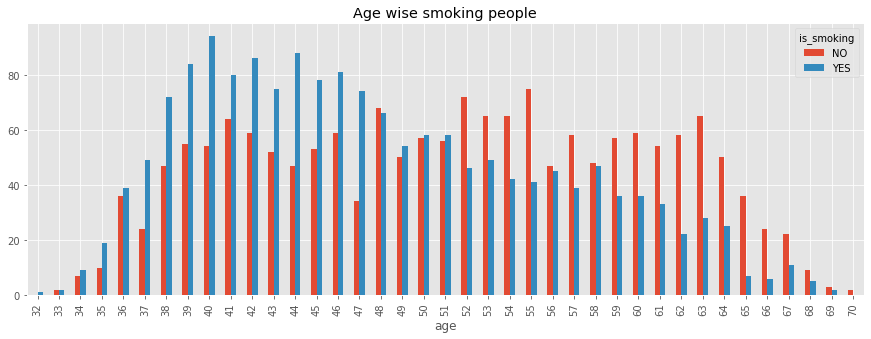

In [47]:
plt.rcParams['figure.figsize'] = (15, 5)
df.groupby(['age','is_smoking'])['id'].count().unstack().plot(kind='bar')
plt.title('Age wise smoking people')

###**Cigretes per Day**

In [48]:
df.groupby(['cigsPerDay'])['id'].count()

cigsPerDay
0.0     1703
1.0       48
2.0       17
3.0       79
4.0        7
5.0      103
6.0       14
7.0        8
8.0       10
9.0      104
10.0     106
11.0       4
12.0       3
13.0       3
14.0       1
15.0     172
16.0       2
17.0       5
18.0       7
19.0       2
20.0     606
23.0       5
25.0      44
30.0     176
35.0      17
38.0       1
40.0      62
43.0      42
45.0       2
50.0       6
60.0       8
70.0       1
Name: id, dtype: int64

Text(0.5, 1.0, 'cigrets per day Proposanate')

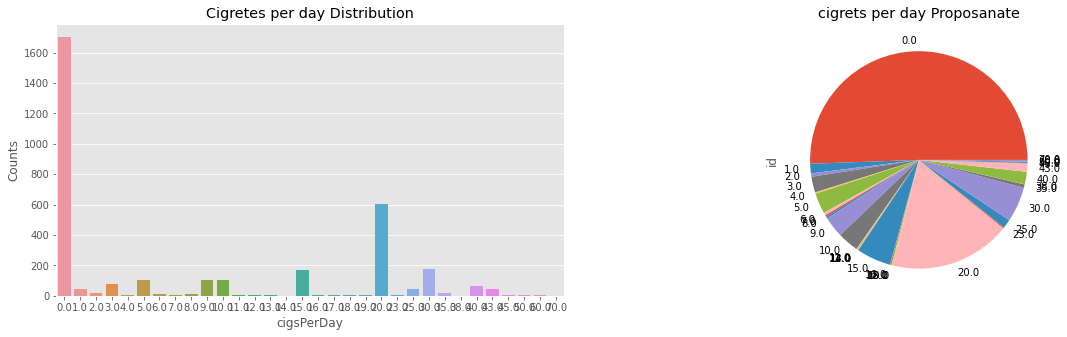

In [49]:
fig, ax = plt.subplots(1,2,figsize=(20,5))
ax1=plt.subplot(1,2,1)
Education_status=pd.DataFrame(df.groupby(['cigsPerDay'])['id'].count())
sns.barplot(x=Education_status.index,y=Education_status['id'])
plt.xlabel('cigsPerDay')
plt.ylabel('Counts')
plt.title('Cigretes per day Distribution')
ax2=plt.subplot(1,2,2)
df.groupby(['cigsPerDay'])['id'].count().plot(kind='pie')
plt.title('cigrets per day Proposanate')

Text(0.5, 1.0, 'cig per day with Ten years CHD')

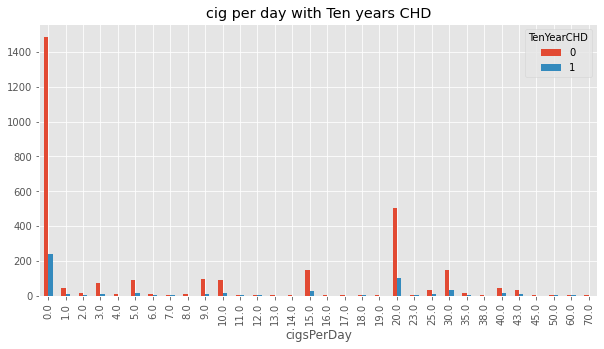

In [50]:
plt.rcParams['figure.figsize'] = (10, 5)
df_copy.groupby(['cigsPerDay','TenYearCHD'])['id'].count().unstack().plot(kind='bar')
plt.title('cig per day with Ten years CHD')

###**BP Medication**

In [51]:
df.groupby(['BPMeds'])['id'].count()

BPMeds
0.0    3246
1.0     100
Name: id, dtype: int64

Text(0.5, 1.0, 'BP Medication persons Proposanate')

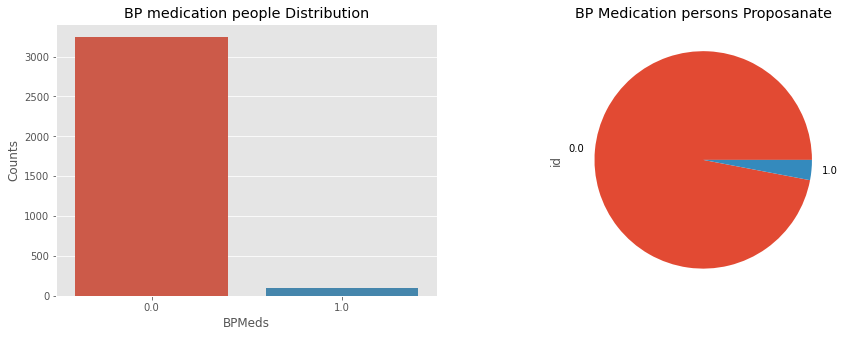

In [52]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
ax1=plt.subplot(1,2,1)
Education_status=pd.DataFrame(df.groupby(['BPMeds'])['id'].count())
sns.barplot(x=Education_status.index,y=Education_status['id'])
plt.xlabel('BPMeds')
plt.ylabel('Counts')
plt.title('BP medication people Distribution')
ax2=plt.subplot(1,2,2)
df.groupby(['BPMeds'])['id'].count().plot(kind='pie')
plt.title('BP Medication persons Proposanate')

Text(0.5, 1.0, 'BP Medication people distribution with Ten years CHD')

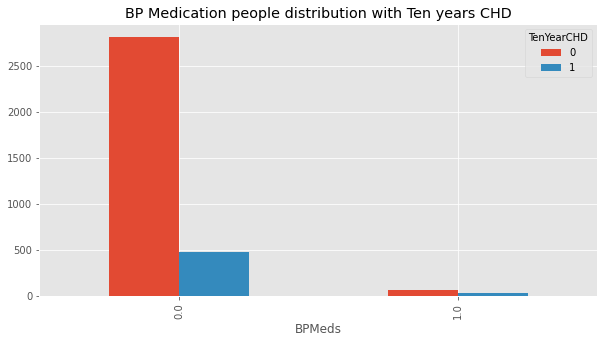

In [53]:
plt.rcParams['figure.figsize'] = (10, 5)
df_copy.groupby(['BPMeds','TenYearCHD'])['id'].count().unstack().plot(kind='bar')
plt.title('BP Medication people distribution with Ten years CHD')

###**Prevalent Stroke**

In [54]:
df.groupby(['prevalentStroke'])['id'].count()

prevalentStroke
0    3368
1      22
Name: id, dtype: int64

Text(0.5, 1.0, 'prevalent Stroke persons Proposanate')

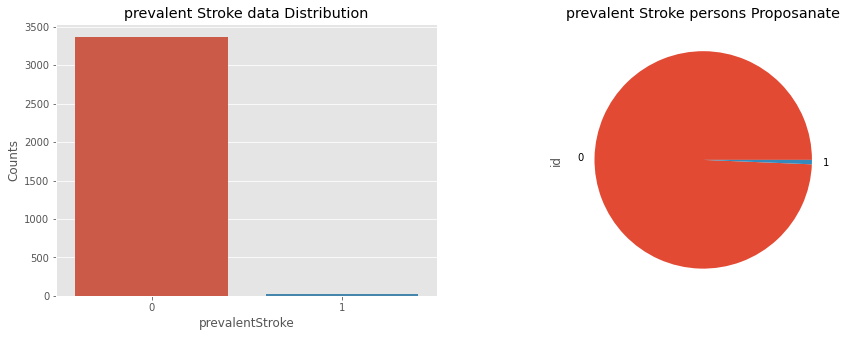

In [55]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
ax1=plt.subplot(1,2,1)
Education_status=pd.DataFrame(df.groupby(['prevalentStroke'])['id'].count())
sns.barplot(x=Education_status.index,y=Education_status['id'])
plt.xlabel('prevalentStroke')
plt.ylabel('Counts')
plt.title('prevalent Stroke data Distribution')
ax2=plt.subplot(1,2,2)
df.groupby(['prevalentStroke'])['id'].count().plot(kind='pie')
plt.title('prevalent Stroke persons Proposanate')

Text(0.5, 1.0, 'prevalentStroke people distribution with Ten years CHD')

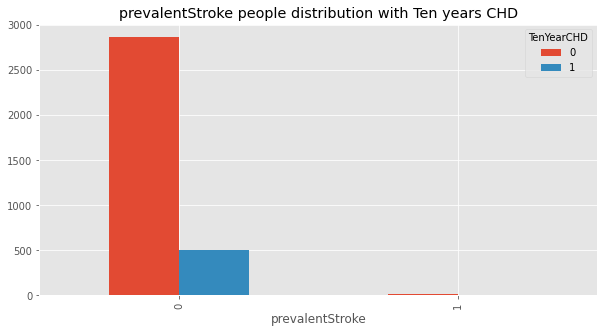

In [56]:
plt.rcParams['figure.figsize'] = (10, 5)
df_copy.groupby(['prevalentStroke','TenYearCHD'])['id'].count().unstack().plot(kind='bar')
plt.title('prevalentStroke people distribution with Ten years CHD')

###**Hypertension**

In [57]:
df.groupby(['prevalentHyp'])['id'].count()

prevalentHyp
0    2321
1    1069
Name: id, dtype: int64

Text(0.5, 1.0, 'prevalent Stroke persons Proposanate')

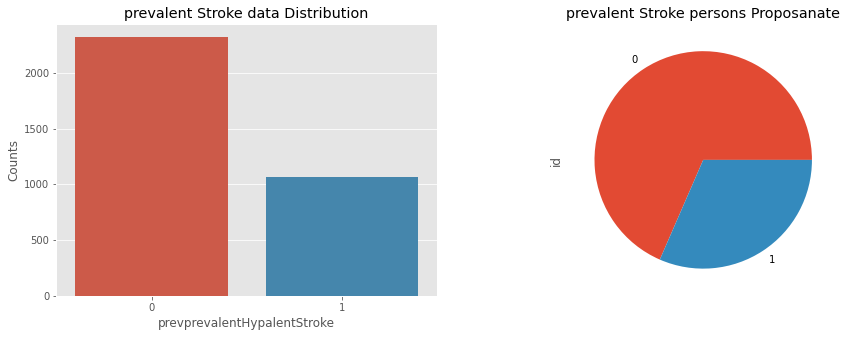

In [58]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
ax1=plt.subplot(1,2,1)
Education_status=pd.DataFrame(df.groupby(['prevalentHyp'])['id'].count())
sns.barplot(x=Education_status.index,y=Education_status['id'])
plt.xlabel('prevprevalentHypalentStroke')
plt.ylabel('Counts')
plt.title('prevalent Stroke data Distribution')
ax2=plt.subplot(1,2,2)
df.groupby(['prevalentHyp'])['id'].count().plot(kind='pie')
plt.title('prevalent Stroke persons Proposanate')

Text(0.5, 1.0, 'prevalentStroke people distribution with Ten years CHD')

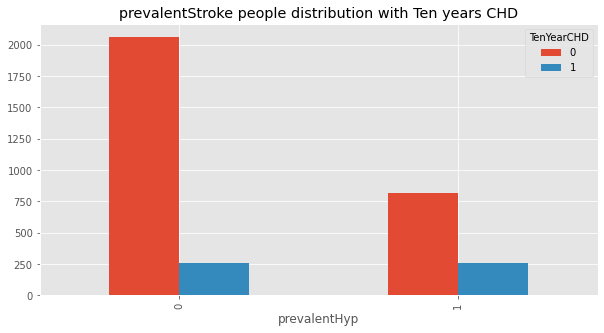

In [59]:
plt.rcParams['figure.figsize'] = (10, 5)
df_copy.groupby(['prevalentHyp','TenYearCHD'])['id'].count().unstack().plot(kind='bar')
plt.title('prevalentStroke people distribution with Ten years CHD')

###**diabetes**

In [60]:
df.groupby(['diabetes'])['id'].count()

diabetes
0    3303
1      87
Name: id, dtype: int64

Text(0.5, 1.0, 'prevalent Stroke persons Proposanate')

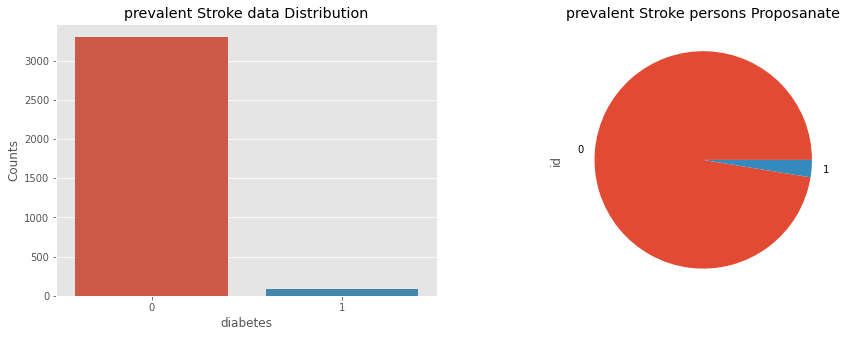

In [61]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
ax1=plt.subplot(1,2,1)
Education_status=pd.DataFrame(df.groupby(['diabetes'])['id'].count())
sns.barplot(x=Education_status.index,y=Education_status['id'])
plt.xlabel('diabetes')
plt.ylabel('Counts')
plt.title('prevalent Stroke data Distribution')
ax2=plt.subplot(1,2,2)
df.groupby(['diabetes'])['id'].count().plot(kind='pie')
plt.title('prevalent Stroke persons Proposanate')

Text(0.5, 1.0, 'prevalentStroke people distribution with Ten years CHD')

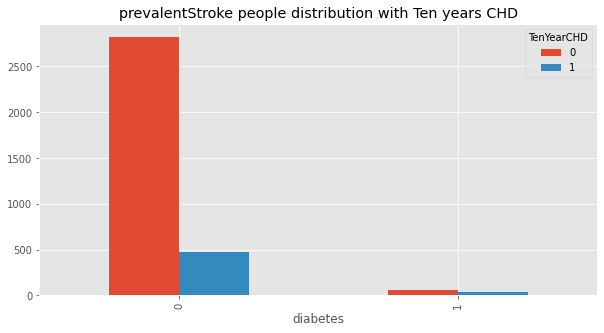

In [62]:
plt.rcParams['figure.figsize'] = (10, 5)
df_copy.groupby(['diabetes','TenYearCHD'])['id'].count().unstack().plot(kind='bar')
plt.title('prevalentStroke people distribution with Ten years CHD')

###**totChol**

In [63]:
df.groupby(['totChol'])['id'].count()

totChol
107.0    1
113.0    1
119.0    1
124.0    1
126.0    1
        ..
439.0    1
453.0    1
464.0    1
600.0    1
696.0    1
Name: id, Length: 240, dtype: int64

Text(0.5, 1.0, 'prevalent Stroke persons Proposanate')

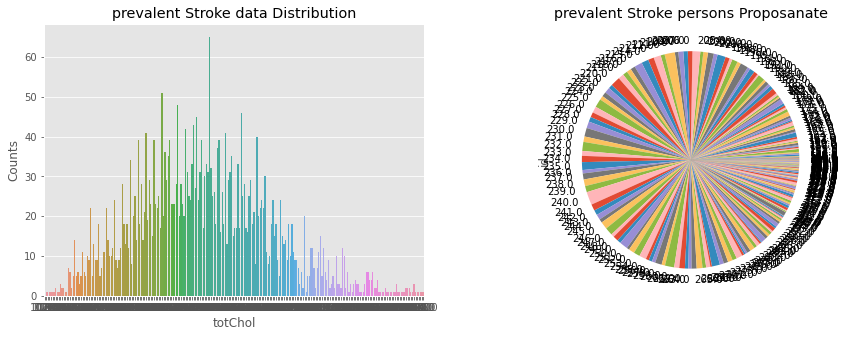

In [64]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
ax1=plt.subplot(1,2,1)
Education_status=pd.DataFrame(df.groupby(['totChol'])['id'].count())
sns.barplot(x=Education_status.index,y=Education_status['id'])
plt.xlabel('totChol')
plt.ylabel('Counts')
plt.title('prevalent Stroke data Distribution')
ax2=plt.subplot(1,2,2)
df.groupby(['totChol'])['id'].count().plot(kind='pie')
plt.title('prevalent Stroke persons Proposanate')

Text(0.5, 1.0, 'prevalentStroke people distribution with Ten years CHD')

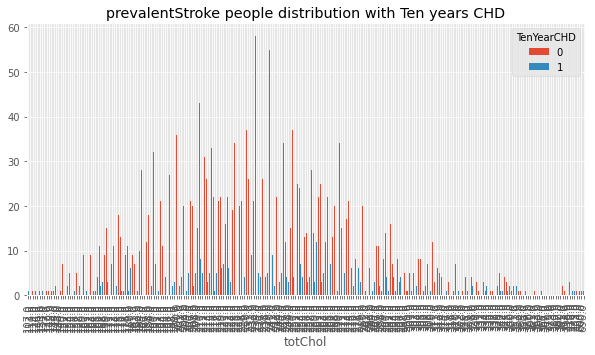

In [65]:
plt.rcParams['figure.figsize'] = (10, 5)
df_copy.groupby(['totChol','TenYearCHD'])['id'].count().unstack().plot(kind='bar')
plt.title('prevalentStroke people distribution with Ten years CHD')

###**sysBP**

In [66]:
df.groupby(['sysBP'])['id'].count()

sysBP
83.5     2
85.0     1
85.5     1
90.0     2
92.5     1
        ..
235.0    1
243.0    1
244.0    1
248.0    1
295.0    1
Name: id, Length: 226, dtype: int64

Text(0.5, 1.0, 'prevalent Stroke persons Proposanate')

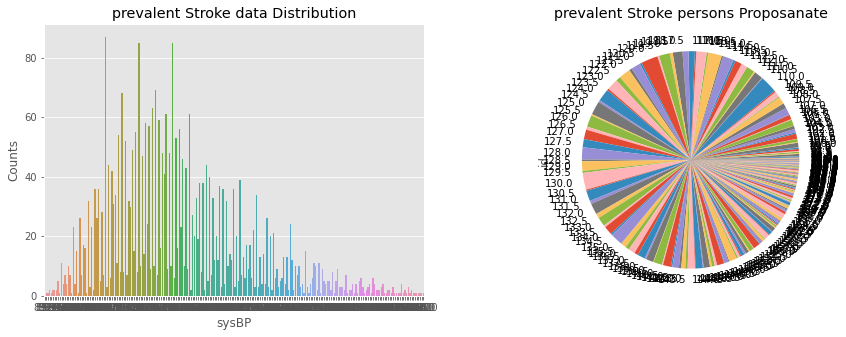

In [67]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
ax1=plt.subplot(1,2,1)
Education_status=pd.DataFrame(df.groupby(['sysBP'])['id'].count())
sns.barplot(x=Education_status.index,y=Education_status['id'])
plt.xlabel('sysBP')
plt.ylabel('Counts')
plt.title('prevalent Stroke data Distribution')
ax2=plt.subplot(1,2,2)
df.groupby(['sysBP'])['id'].count().plot(kind='pie')
plt.title('prevalent Stroke persons Proposanate')

Text(0.5, 1.0, 'prevalentStroke people distribution with Ten years CHD')

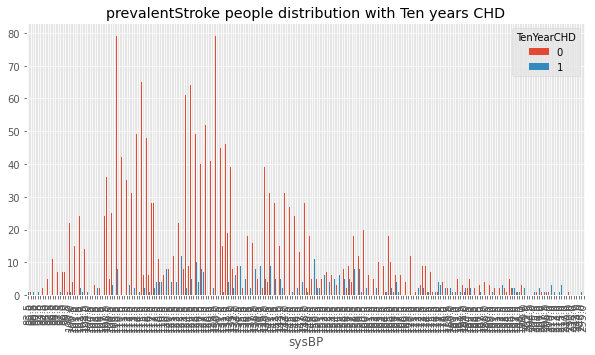

In [68]:
plt.rcParams['figure.figsize'] = (10, 5)
df_copy.groupby(['sysBP','TenYearCHD'])['id'].count().unstack().plot(kind='bar')
plt.title('prevalentStroke people distribution with Ten years CHD')

###**diaBP**

In [69]:
df.groupby(['diaBP'])['id'].count()

diaBP
48.0     1
50.0     1
51.0     1
52.0     2
53.0     1
        ..
130.0    5
133.0    2
135.0    2
136.0    2
142.5    1
Name: id, Length: 142, dtype: int64

Text(0.5, 1.0, 'prevalent Stroke persons Proposanate')

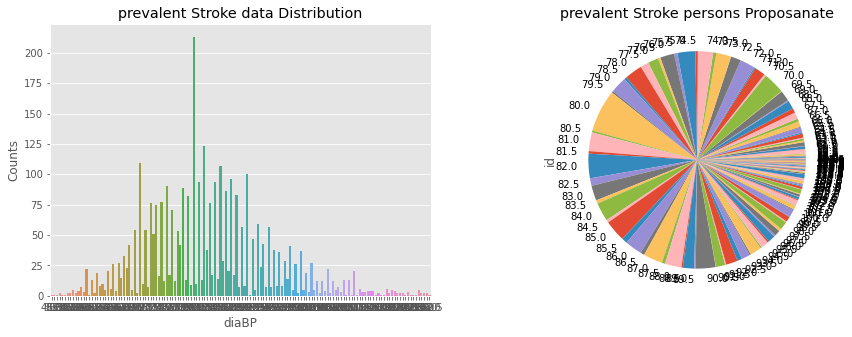

In [70]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
ax1=plt.subplot(1,2,1)
Education_status=pd.DataFrame(df.groupby(['diaBP'])['id'].count())
sns.barplot(x=Education_status.index,y=Education_status['id'])
plt.xlabel('diaBP')
plt.ylabel('Counts')
plt.title('prevalent Stroke data Distribution')
ax2=plt.subplot(1,2,2)
df.groupby(['diaBP'])['id'].count().plot(kind='pie')
plt.title('prevalent Stroke persons Proposanate')

Text(0.5, 1.0, 'prevalentStroke people distribution with Ten years CHD')

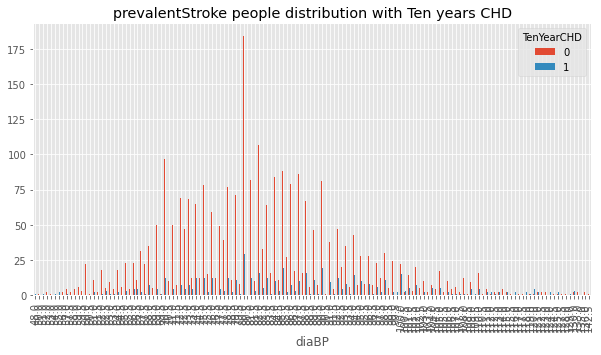

In [71]:
plt.rcParams['figure.figsize'] = (10, 5)
df_copy.groupby(['diaBP','TenYearCHD'])['id'].count().unstack().plot(kind='bar')
plt.title('prevalentStroke people distribution with Ten years CHD')

###**BMI**

In [72]:
df.groupby(['BMI'])['id'].count()

BMI
15.96    1
16.48    1
16.59    1
16.61    1
16.69    1
        ..
44.71    1
45.79    1
45.80    1
51.28    1
56.80    1
Name: id, Length: 1259, dtype: int64

Text(0.5, 1.0, 'prevalent Stroke persons Proposanate')

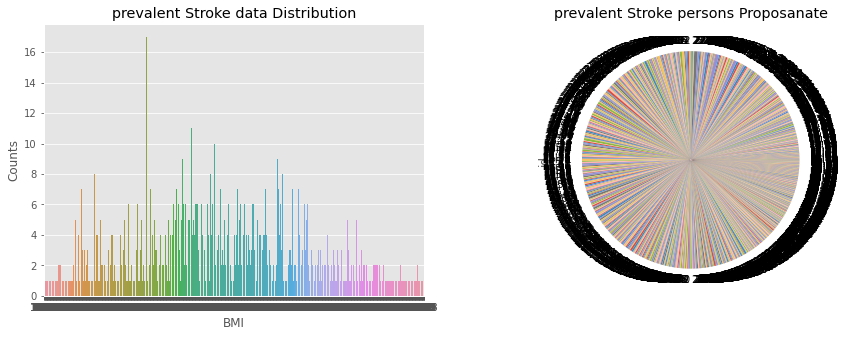

In [73]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
ax1=plt.subplot(1,2,1)
Education_status=pd.DataFrame(df.groupby(['BMI'])['id'].count())
sns.barplot(x=Education_status.index,y=Education_status['id'])
plt.xlabel('BMI')
plt.ylabel('Counts')
plt.title('prevalent Stroke data Distribution')
ax2=plt.subplot(1,2,2)
df.groupby(['BMI'])['id'].count().plot(kind='pie')
plt.title('prevalent Stroke persons Proposanate')

Text(0.5, 1.0, 'prevalentStroke people distribution with Ten years CHD')

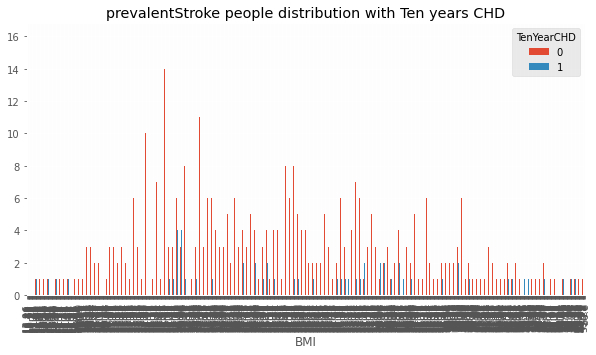

In [74]:
plt.rcParams['figure.figsize'] = (10, 5)
df_copy.groupby(['BMI','TenYearCHD'])['id'].count().unstack().plot(kind='bar')
plt.title('prevalentStroke people distribution with Ten years CHD')

###**Heart Rate**

In [75]:
df.groupby(['heartRate'])['id'].count()

heartRate
45.0      1
47.0      1
48.0      4
50.0     15
51.0      1
         ..
120.0     5
122.0     2
125.0     3
140.0     1
143.0     1
Name: id, Length: 68, dtype: int64

Text(0.5, 1.0, 'prevalent Stroke persons Proposanate')

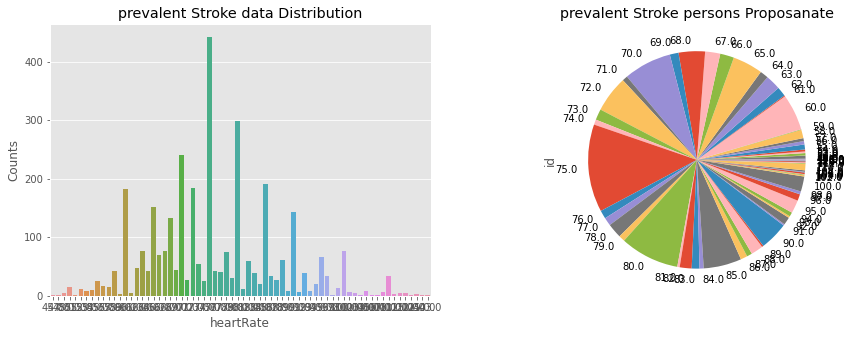

In [76]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
ax1=plt.subplot(1,2,1)
Education_status=pd.DataFrame(df.groupby(['heartRate'])['id'].count())
sns.barplot(x=Education_status.index,y=Education_status['id'])
plt.xlabel('heartRate')
plt.ylabel('Counts')
plt.title('prevalent Stroke data Distribution')
ax2=plt.subplot(1,2,2)
df.groupby(['heartRate'])['id'].count().plot(kind='pie')
plt.title('prevalent Stroke persons Proposanate')

Text(0.5, 1.0, 'prevalentStroke people distribution with Ten years CHD')

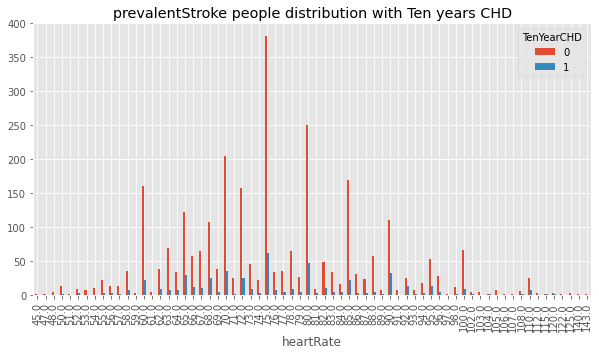

In [77]:
plt.rcParams['figure.figsize'] = (10, 5)
df_copy.groupby(['heartRate','TenYearCHD'])['id'].count().unstack().plot(kind='bar')
plt.title('prevalentStroke people distribution with Ten years CHD')

###**Glucose**

In [78]:
df.groupby(['glucose'])['id'].count()

glucose
40.0     1
43.0     1
44.0     2
45.0     3
47.0     2
        ..
332.0    1
348.0    1
368.0    1
386.0    1
394.0    2
Name: id, Length: 132, dtype: int64

Text(0.5, 1.0, 'prevalent Stroke persons Proposanate')

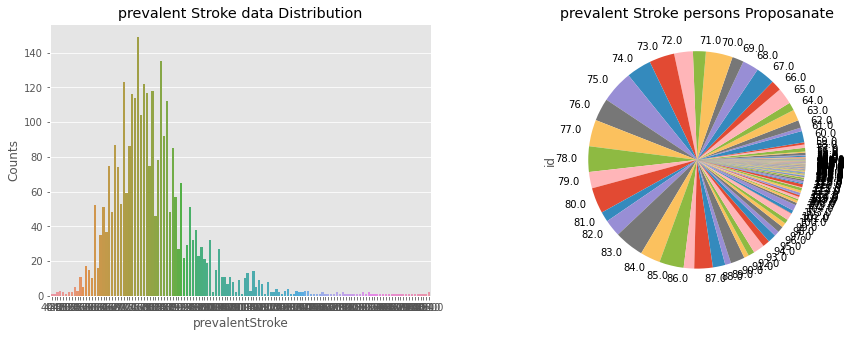

In [79]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
ax1=plt.subplot(1,2,1)
Education_status=pd.DataFrame(df.groupby(['glucose'])['id'].count())
sns.barplot(x=Education_status.index,y=Education_status['id'])
plt.xlabel('prevalentStroke')
plt.ylabel('Counts')
plt.title('prevalent Stroke data Distribution')
ax2=plt.subplot(1,2,2)
df.groupby(['glucose'])['id'].count().plot(kind='pie')
plt.title('prevalent Stroke persons Proposanate')

Text(0.5, 1.0, 'prevalentStroke people distribution with Ten years CHD')

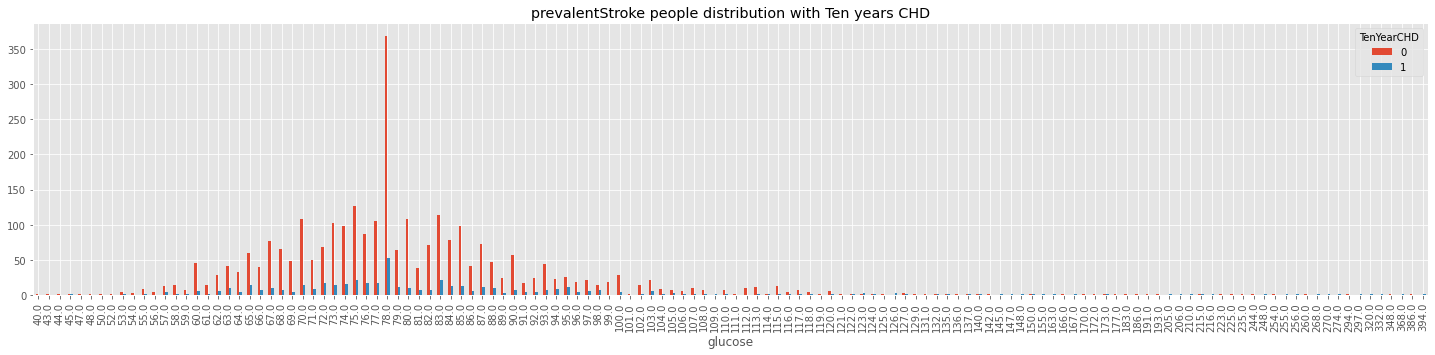

In [80]:
plt.rcParams['figure.figsize'] = (25, 5)
df_copy.groupby(['glucose','TenYearCHD'])['id'].count().unstack().plot(kind='bar')
plt.title('prevalentStroke people distribution with Ten years CHD')

In [81]:
le=LabelEncoder()
df_copy['sex']=le.fit_transform(df_copy['sex'])
df_copy['is_smoking']=le.fit_transform(df_copy['is_smoking'])


In [82]:
df_copy.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,1,36,4.0,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [83]:
df_copy.drop(['id'],axis=1,inplace=True) #Id is not useful for Model training.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8d5b422150>,
      dtype=object)

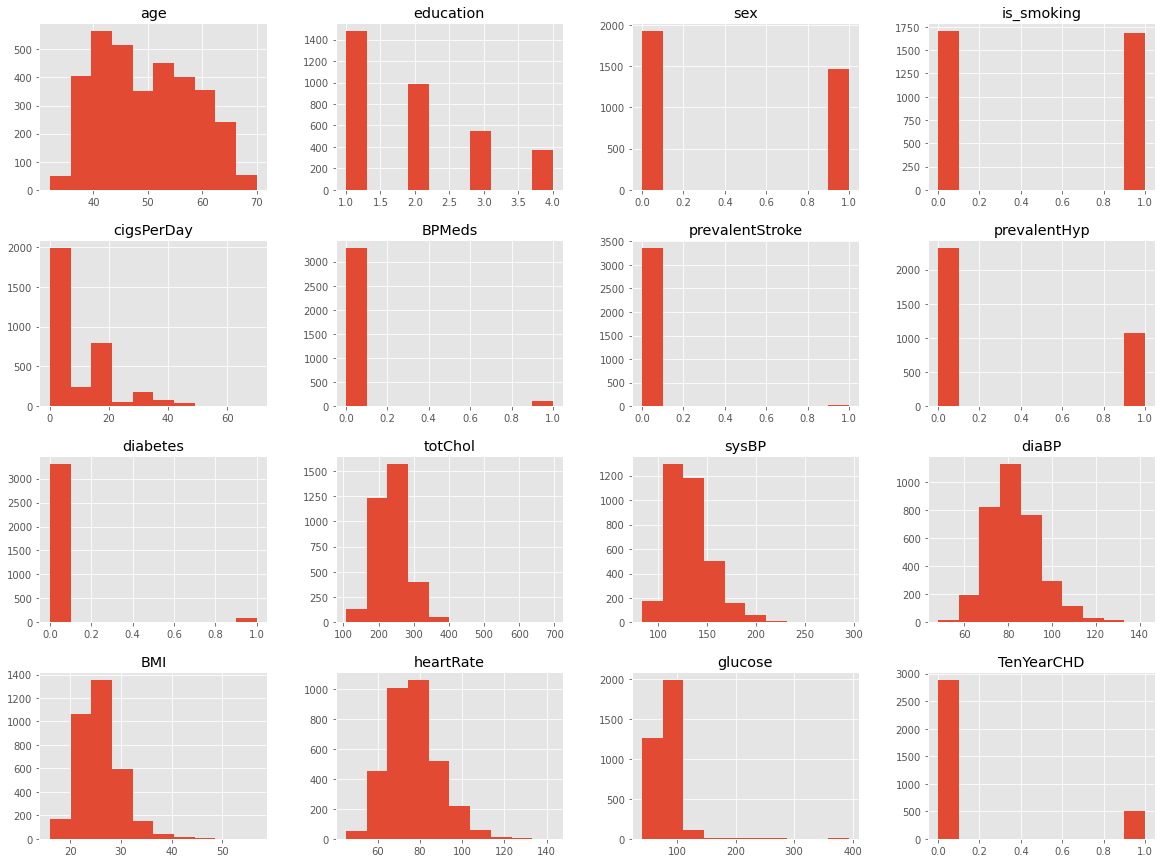

In [84]:
fig = plt.figure(figsize = (20,15))
ax = fig.gca()
df_copy.hist(ax = ax)

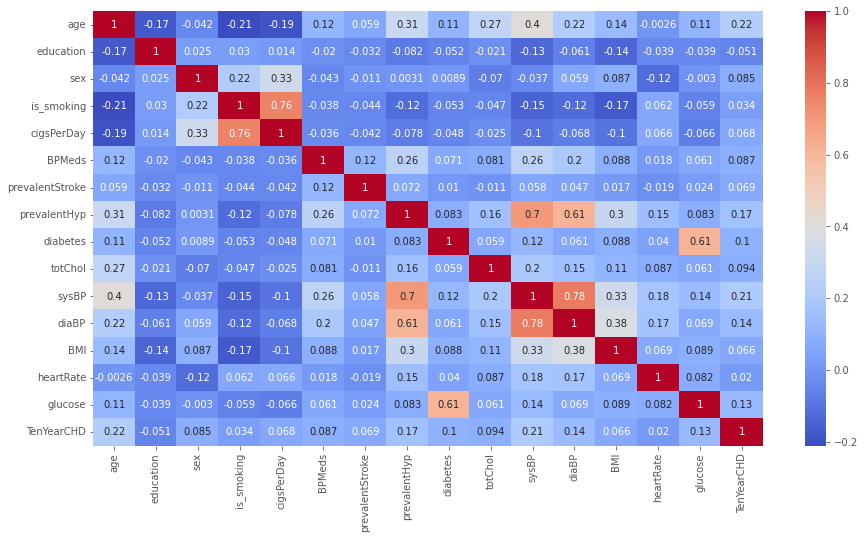

In [85]:
plt.figure(figsize=(15,8))
correlation = df_copy.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')

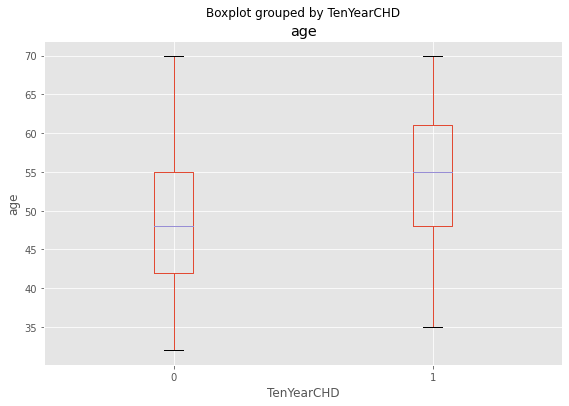

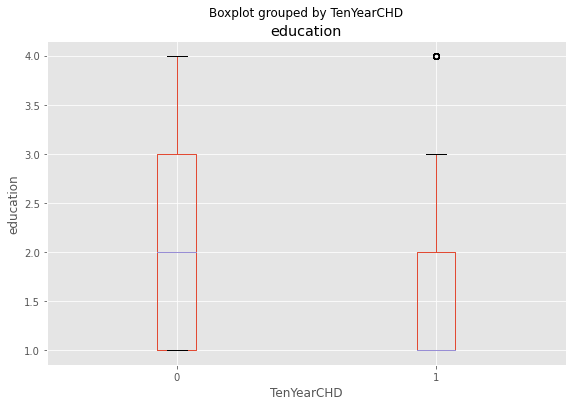

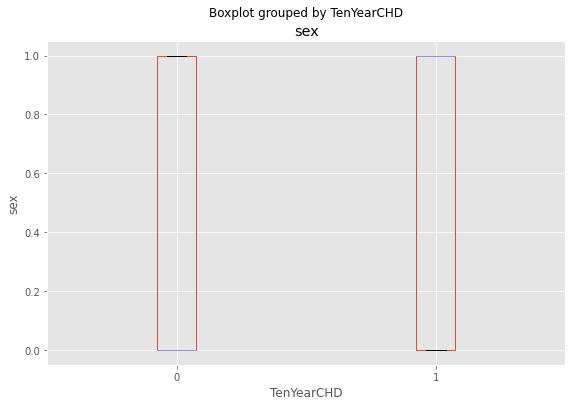

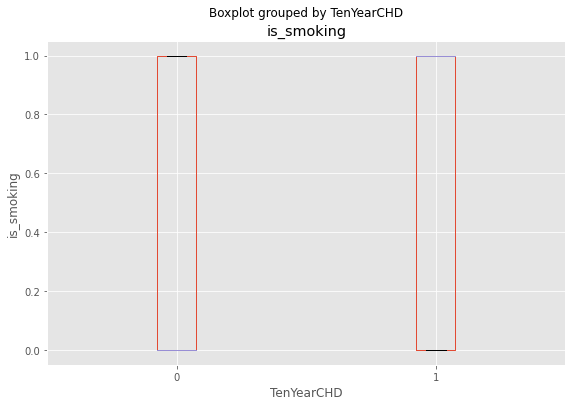

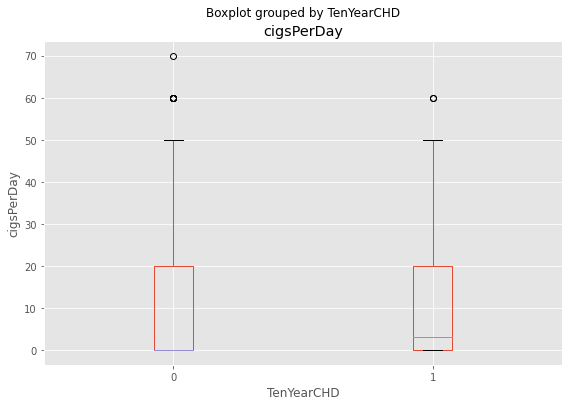

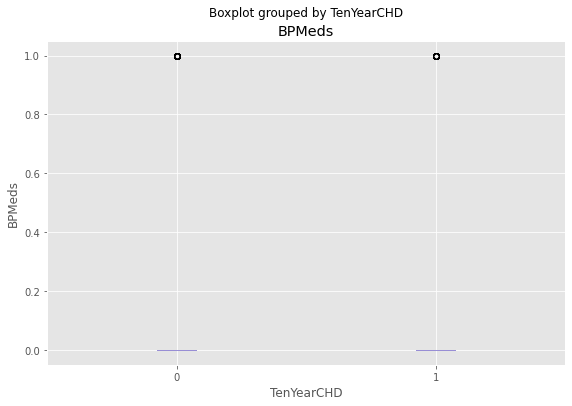

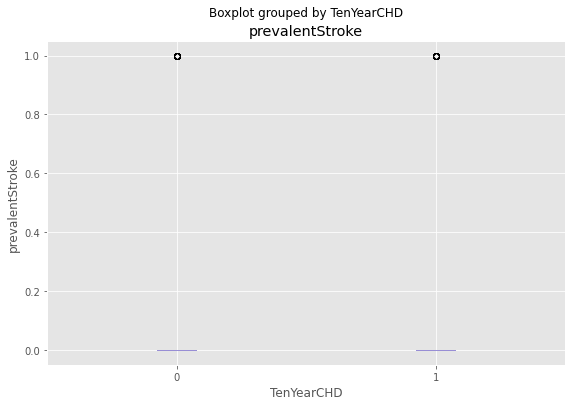

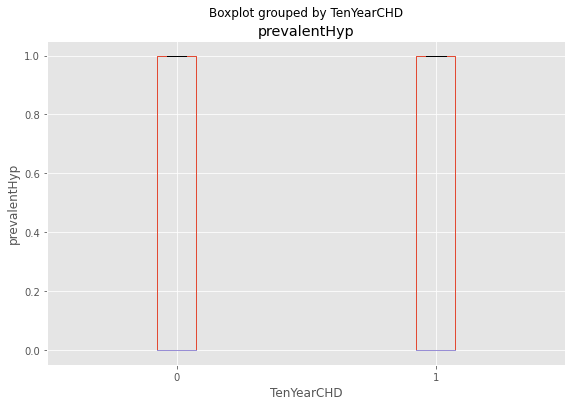

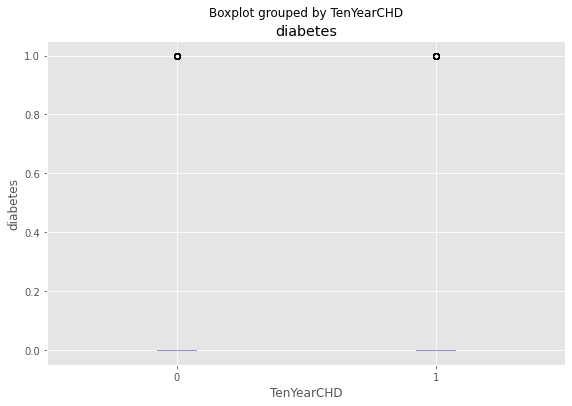

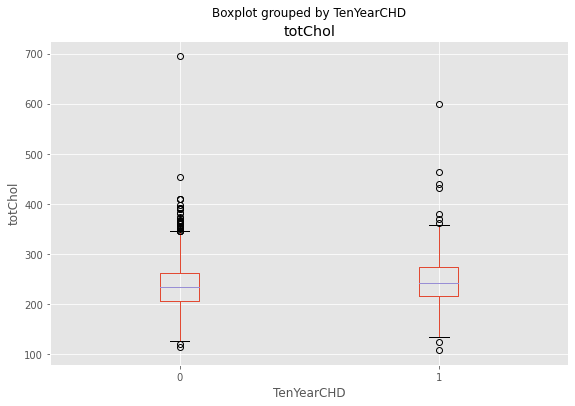

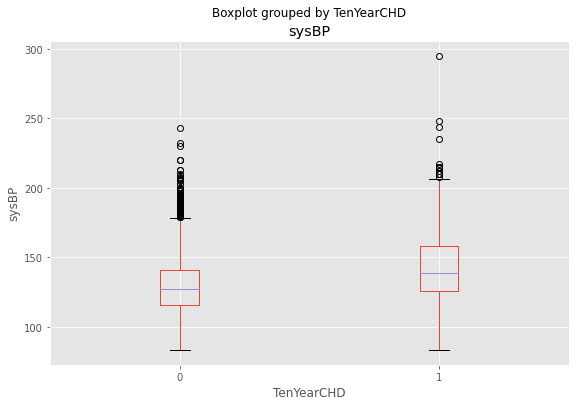

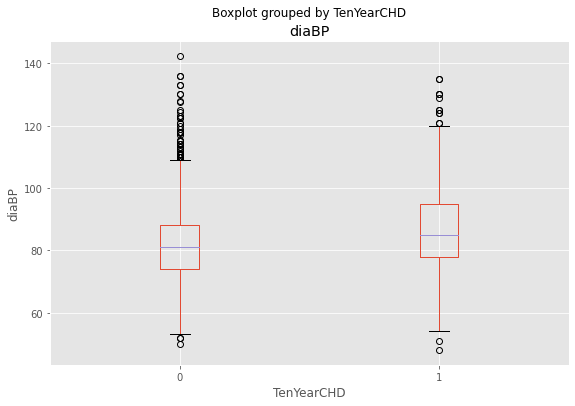

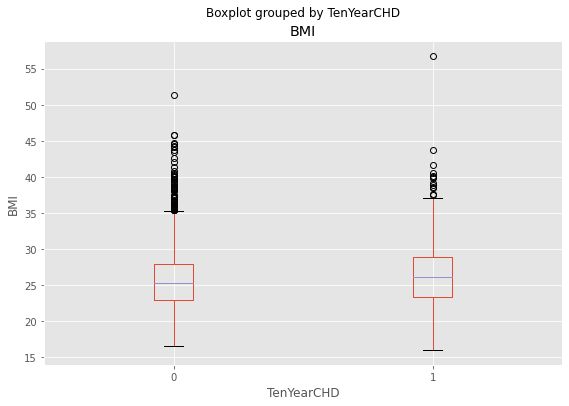

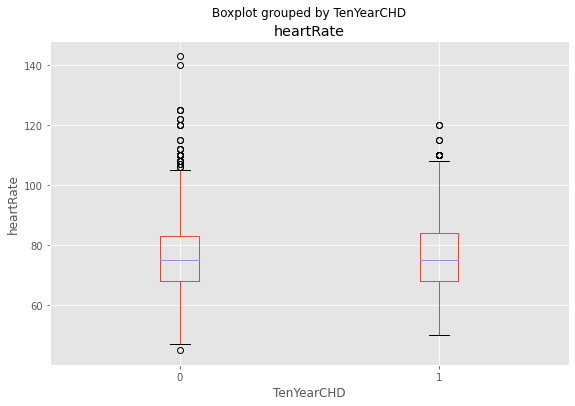

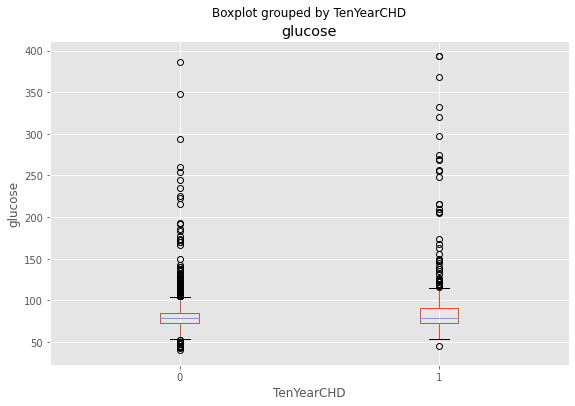

In [86]:
for i in df_copy.columns[:-1]:
  fig = plt.figure(figsize=(9, 6))
  ax = fig.gca()
  df_copy.boxplot(column = i, by = 'TenYearCHD', ax = ax)
  ax.set_ylabel(i)
plt.show()

#**Classfication- Mechine Learning**

###Data Splitting

In [87]:
X=df_copy[['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
        'diaBP', 'BMI', 'heartRate', 'glucose']].copy()
y=df_copy['TenYearCHD'].copy()

In [88]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(2712, 15)
(678, 15)


In [89]:
y_train.value_counts()

0    2305
1     407
Name: TenYearCHD, dtype: int64

In [90]:
y_test.value_counts()

0    574
1    104
Name: TenYearCHD, dtype: int64

## **Logistic Regression**

In [91]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(fit_intercept=True, max_iter=10000)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [92]:
# Get the model coefficients
clf.coef_

array([[ 0.06306523, -0.02500812,  0.48473712,  0.03305798,  0.02351736,
        -0.1632397 ,  1.09964401,  0.03655611,  0.05497745,  0.00338943,
         0.01938861, -0.00146013, -0.0077644 , -0.00571097,  0.00961302]])

In [93]:
clf.intercept_

array([-8.94971354])

In [94]:
# Get the predicted classes
train_class_preds = clf.predict(X_train)
test_class_preds = clf.predict(X_test)

In [95]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

In [96]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_class_preds,y_train)
test_accuracy = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.8606194690265486
The accuracy on test data is  0.8466076696165191


[[2290   15]
 [ 363   44]]


[Text(0, 0.5, 'Negative'), Text(0, 1.5, 'Positive')]

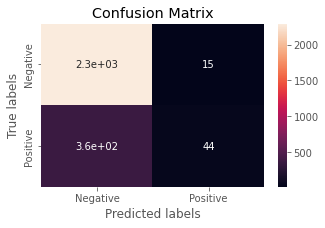

In [97]:
# Get the confusion matrix for both train and test
plt.figure(figsize=(5,3))
labels = ['Negative', 'Positive']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[566   8]
 [ 96   8]]


[Text(0, 0.5, 'Retained'), Text(0, 1.5, 'Churned')]

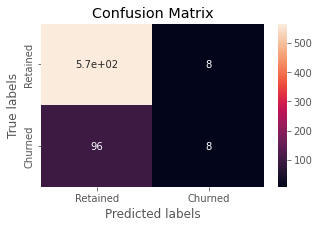

In [98]:
# Get the confusion matrix for both train and test
plt.figure(figsize=(5,3))
labels = ['Retained', 'Churned']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [99]:
y_lr_predict_pro=clf.predict_proba(X_test)[:,1]

In [100]:
fpr, tpr, thresholds = roc_curve(y_test, y_lr_predict_pro)

In [101]:
roc_auc_score(y_test,y_lr_predict_pro)

0.6821060037523452

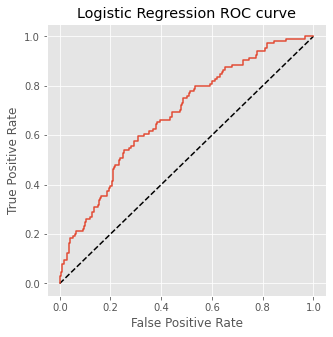

In [102]:
plt.figure(figsize=(5,5))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC curve')
plt.show()

##<b> Handling Data Imbalalance

In [103]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)
# X_sm, y_sm = smote.fit(X,y)

In [104]:
y_sm=pd.DataFrame(y_sm)

In [105]:
y_sm.value_counts()

TenYearCHD
1             2879
0             2879
dtype: int64

##<b> Logistic Regression

In [106]:
X_train, X_test, y_train, y_test = train_test_split( X_sm,y_sm , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(4606, 15)
(1152, 15)


In [107]:
y_train.value_counts()

TenYearCHD
0             2326
1             2280
dtype: int64

In [108]:
y_test.value_counts()

TenYearCHD
1             599
0             553
dtype: int64

In [109]:
clf = LogisticRegression(fit_intercept=True, max_iter=10000)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [110]:
# Get the predicted classes
train_class_preds = clf.predict(X_train)
test_class_preds = clf.predict(X_test)

In [111]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_class_preds,y_train)
test_accuracy = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.6773773339122883
The accuracy on test data is  0.6753472222222222


In [112]:
# Get the confusion matrix for both train and test

cm = confusion_matrix(y_train, train_class_preds)
print('Confusion Matrix for training Data')
print(cm)
cm = confusion_matrix(y_test, test_class_preds)
print('Confusion Matrix for Test Data')
print(cm)

Confusion Matrix for training Data
[[1597  729]
 [ 757 1523]]
Confusion Matrix for Test Data
[[376 177]
 [197 402]]


In [113]:
y_lr_predict_pro=clf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_lr_predict_pro)

In [114]:
roc_auc_score(y_test,y_lr_predict_pro)

0.7456369416175845

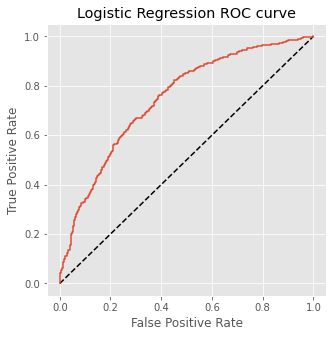

In [115]:
plt.figure(figsize=(5,5))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC curve')
plt.show()

##<b>Decision Tree Classifier

In [116]:
dt_scores = []
for i in range(1, len(X.columns) + 1):
    dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 0)
    dt_classifier.fit(X_train, y_train)
    dt_scores.append(round(dt_classifier.score(X_test, y_test),2))

Text(0.5, 1.0, 'Decision Tree Classifier scores for different number of maximum features')

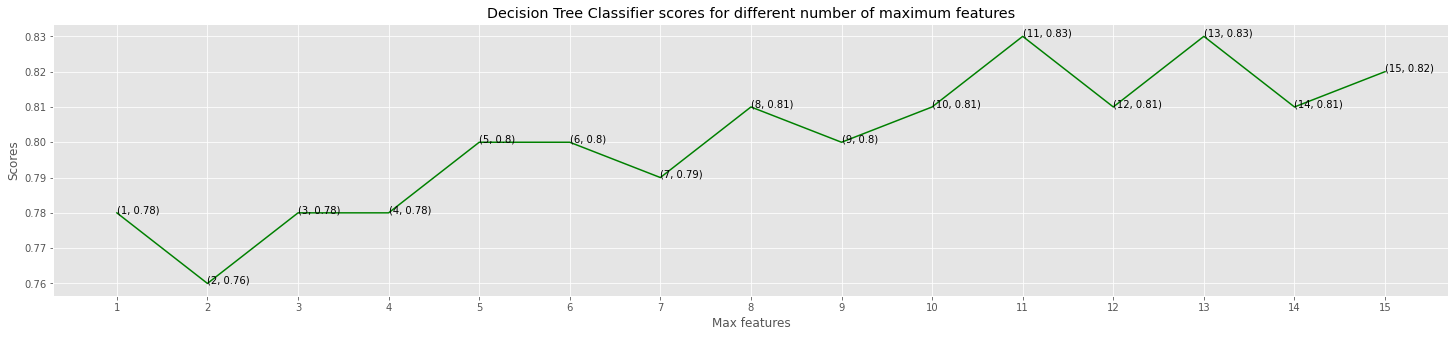

In [117]:
plt.plot([i for i in range(1, len(X.columns) + 1)], dt_scores, color = 'green')
for i in range(1, len(X.columns) + 1):
    plt.text(i, dt_scores[i-1], (i, dt_scores[i-1]))
plt.xticks([i for i in range(1, len(X.columns) + 1)])
plt.xlabel('Max features')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different number of maximum features')

In [118]:
y_dt_predict_pro=dt_classifier.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_dt_predict_pro)

In [119]:
roc_auc_score(y_test,y_dt_predict_pro)

0.8167907935769984

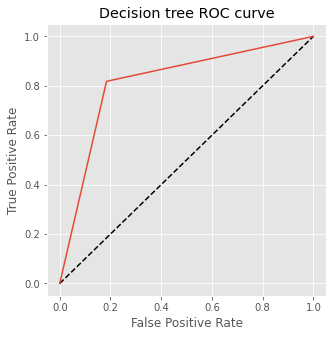

In [120]:
plt.figure(figsize=(5,5))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision tree ROC curve')
plt.show()

In [121]:
features = X.columns
importances = dt_classifier.feature_importances_
indices = np.argsort(importances)

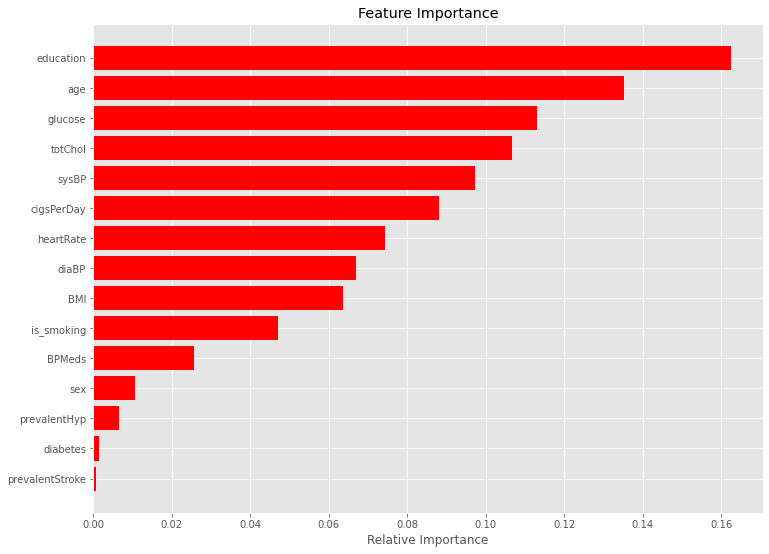

In [122]:
plt.figure(figsize=(12,9))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

##<b> Random Forest

In [123]:
classifier = RandomForestClassifier() # For GBM, use GradientBoostingClassifier()
grid_values = {'n_estimators':[50, 65, 80, 95,120], 'max_depth':[3, 5, 7,9,12]}
GSclassifier = GridSearchCV(classifier, param_grid = grid_values, scoring = 'roc_auc', cv=5)

# Fit the object to train dataset
GSclassifier.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7, 9, 12],
                         'n_estimators': [50, 65, 80, 95, 120]},
             scoring='roc_auc')

In [124]:
bestvalues=GSclassifier.best_params_
GSclassifier.best_params_


{'max_depth': 12, 'n_estimators': 120}

In [125]:
classifier = RandomForestClassifier(max_depth=bestvalues['max_depth'],n_estimators=bestvalues['n_estimators']) # For GBM, use GradientBoostingClassifier()

classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=12, n_estimators=120)

In [126]:
y_train_preds_rf =  classifier.predict(X_train)
y_test_preds_rf= classifier.predict(X_test)

In [127]:
# Obtain accuracy on train set
accuracy_score(y_train,y_train_preds_rf)

0.9887103777681285

In [128]:
# Obtain accuracy on test set
accuracy_score(y_test,y_test_preds_rf)

0.8810763888888888

In [129]:
y_rf_predict_pro=classifier.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_rf_predict_pro)

In [130]:
roc_auc_score(y_test,y_rf_predict_pro)

0.9546139285789758

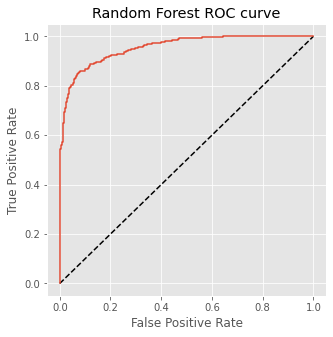

In [131]:
plt.figure(figsize=(5,5))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC curve')
plt.show()

In [132]:
features = X.columns
importances = classifier.feature_importances_
indices = np.argsort(importances)

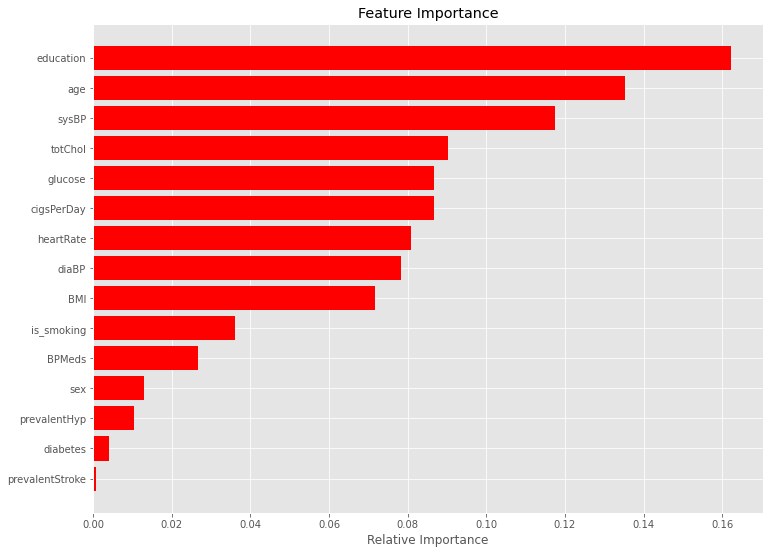

In [133]:
plt.figure(figsize=(12,9))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

##<b>KNN

In [134]:
param_grid = {'n_neighbors':np.arange(1,50)}

In [135]:
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_sm,y_sm)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [136]:
bestPermet=knn_cv.best_params_
knn_cv.best_params_

{'n_neighbors': 2}

In [137]:
#Setup arrays to store training and test accuracies
neighbors = np.arange(1,30)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model
    knn.fit(X_train, y_train)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    # Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

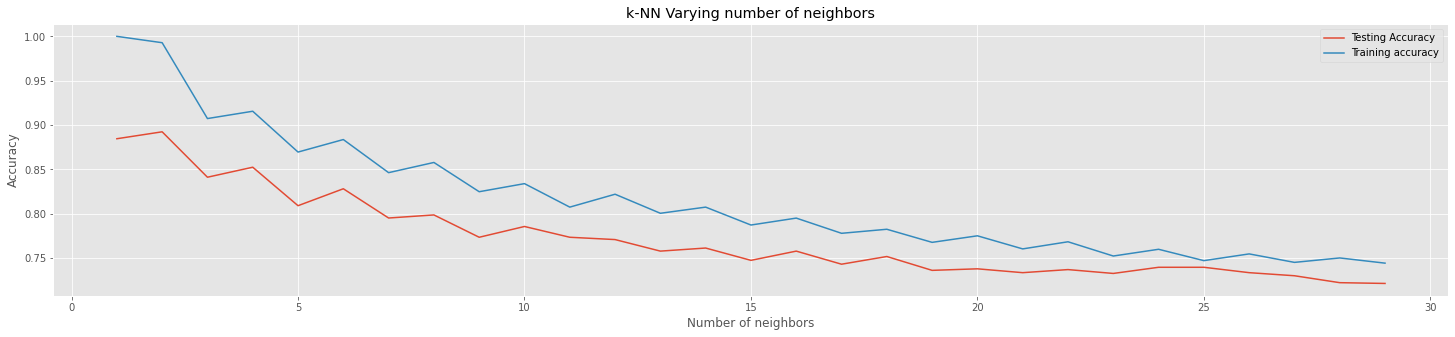

In [138]:
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [139]:
# Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=bestPermet['n_neighbors'])

In [140]:
# Fit the model
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [141]:
knn.score(X_test,y_test)

0.8923611111111112

In [142]:
y_test_pred_knn = knn.predict(X_test)

In [143]:
confusion_matrix(y_test,y_test_pred_knn)

array([[459,  94],
       [ 30, 569]])

In [144]:
y_pred_proba = knn.predict_proba(X_test)[:,1]

In [145]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

In [146]:
roc_auc_score(y_test,y_pred_proba)

0.9024564750775101

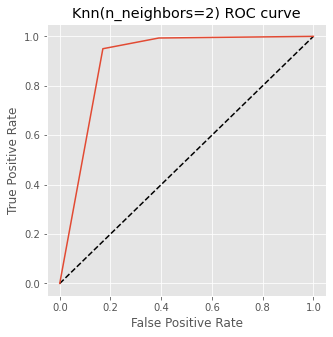

In [147]:
plt.figure(figsize=(5,5))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Knn(n_neighbors=2) ROC curve')
plt.show()

##<b> SVM

In [148]:
svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc_classifier = SVC(kernel = kernels[i])
    svc_classifier.fit(X_train, y_train)
    svc_scores.append(round(svc_classifier.score(X_test, y_test),2))

Text(0.5, 1.0, 'Support Vector Classifier scores for different kernels')

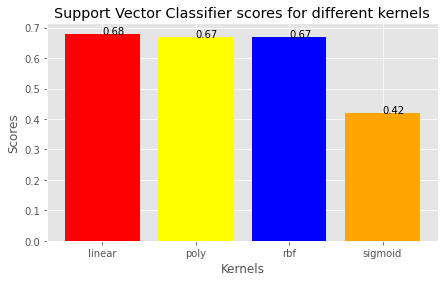

In [149]:
# colors = rainbow(np.linspace(0, 1, len(kernels)))
plt.figure(figsize=(7,4))
plt.bar(kernels, svc_scores,color=['red', 'yellow', 'blue', 'orange'])
for i in range(len(kernels)):
    plt.text(i, svc_scores[i], svc_scores[i])
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('Support Vector Classifier scores for different kernels')

In [150]:
svm=SVC(probability=True)
svm.fit(X_train,y_train)

SVC(probability=True)

In [151]:
svm.score(X_test,y_test)

0.6666666666666666

In [152]:
y_svm_predi=svm.predict(X_test)


In [153]:
confusion_matrix(y_test,y_svm_predi)

array([[337, 216],
       [168, 431]])

In [154]:
y_svm_predict_pro=svm.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_svm_predict_pro)

In [155]:
roc_auc_score(y_test,y_svm_predict_pro)

0.7188850012226528

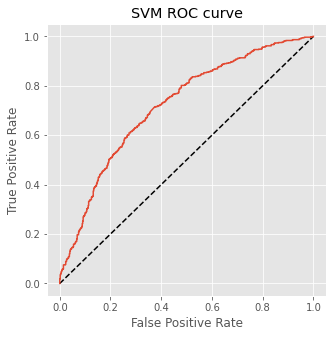

In [156]:
plt.figure(figsize=(5,5))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='SVM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM ROC curve')
plt.show()

##<b> Cat Boost

In [157]:
!pip install catboost

     |████████████████████████████████| 76.1 MB 1.2 MB/s 


In [158]:
from catboost import CatBoostClassifier

In [159]:
catboost=CatBoostClassifier(iterations=100,learning_rate=0.03)

In [160]:
catboost.fit(X_train,y_train,verbose=10)

0:	learn: 0.6881792	total: 50.9ms	remaining: 5.04s
10:	learn: 0.6397071	total: 84.6ms	remaining: 685ms
20:	learn: 0.5933849	total: 118ms	remaining: 444ms
30:	learn: 0.5594332	total: 153ms	remaining: 340ms
40:	learn: 0.5309127	total: 186ms	remaining: 267ms
50:	learn: 0.5063366	total: 219ms	remaining: 210ms
60:	learn: 0.4860216	total: 259ms	remaining: 166ms
70:	learn: 0.4708254	total: 294ms	remaining: 120ms
80:	learn: 0.4564930	total: 327ms	remaining: 76.8ms
90:	learn: 0.4436746	total: 361ms	remaining: 35.7ms
99:	learn: 0.4344186	total: 391ms	remaining: 0us


In [161]:
y_catboost_pred=catboost.predict(X_test)
y_catboost_pre_prob=catboost.predict_proba(X_test)[:,1]

In [162]:
catboost.score(X_test,y_test)

0.8194444444444444

In [163]:
confusion_matrix(y_test,y_catboost_pred)

array([[488,  65],
       [143, 456]])

In [164]:
roc_auc_score(y_test,y_catboost_pre_prob)

0.8936231875307551

In [165]:
fpr, tpr, thresholds = roc_curve(y_test, y_catboost_pre_prob)

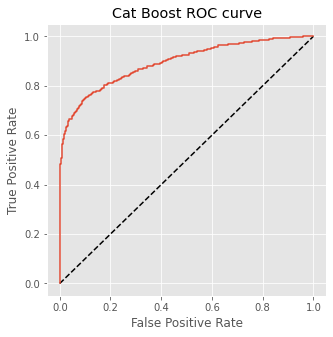

In [166]:
plt.figure(figsize=(5,5))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Cat Boost')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Cat Boost ROC curve')
plt.show()

##<b> Neural Networks


In [167]:
X_train=pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)

In [168]:
# #since we shuffled, the index numbers were messed up, this resets them
X_train = X_train.reset_index(drop=True) 
y_train = y_train.reset_index(drop=True)

#convert to numpy arrays with float values
X_train = np.array(X_train, dtype=float)
y_train = np.array(y_train, dtype=float)

#reshape y_train to make matrix multiplication possible
y_train = np.array(y_train).reshape(-1, 1)

In [169]:
class Perceptron:
    def __init__(self, x, y):

        self.input = np.array(x, dtype=float) 
        self.label = np.array(y, dtype=float)
        self.weights = np.random.rand(x.shape[1], y.shape[1]) #randomly initialize the weights
        self.z = self.input@self.weights #dot product of the vectors
        self.yhat = self.sigmoid(self.z) #apply activation function

    
    def sigmoid(self, x):
        return 1.0/(1.0+np.exp(-x))

    def sigmoid_deriv(self, x):
        s = sigmoid(x)
        return s(1-s)

    def forward_prop(self):
        self.yhat = self.sigmoid(self.input @ self.weights) #@ symbol represents matrix multiplication (also works for vectors)
        return self.yhat

    def back_prop(self):
        gradient = self.input.T @ (-2.0*(self.label - self.yhat)*self.sigmoid(self.yhat))  #self.input is the x value

        self.weights -= gradient #process of finding the minimum loss

In [170]:
simple_nn = Perceptron(X_train, y_train)
training_iterations = 1000

history = [] #we will store how the mean squared error changes after each iteration in this array

def mse(yhat, y):
    sum = 0.0
    for pred, label in zip(yhat, y):
        sum += (pred-label)**2
    return sum/len(yhat)

for i in range(training_iterations):
    simple_nn.forward_prop()
    simple_nn.back_prop()
    yhat = simple_nn.forward_prop()
    history.append(mse(yhat, simple_nn.label))

    
    
yhat = simple_nn.forward_prop()
print(f'Final Mean Squared Error: {mse(yhat, simple_nn.label)}')

Final Mean Squared Error: [0.49500651]


Text(0.5, 0, 'Training Iteration')

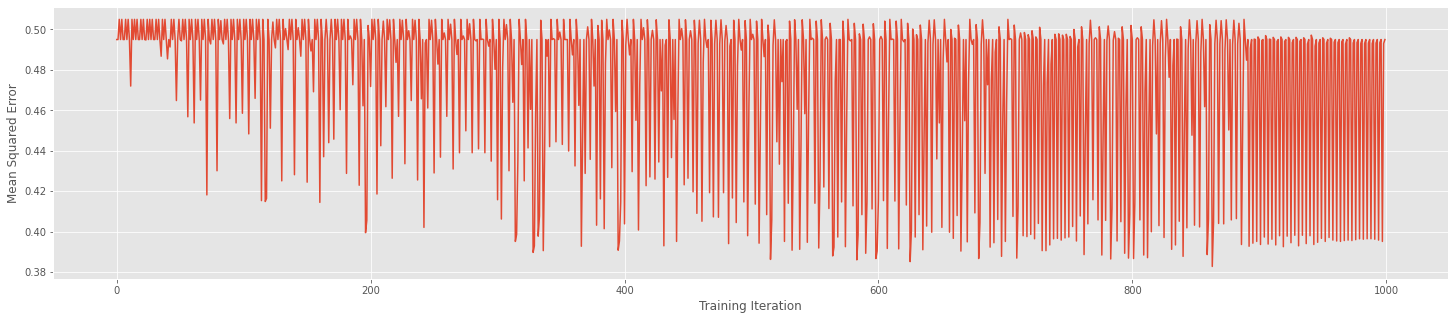

In [171]:
plt.plot(history)
plt.ylabel('Mean Squared Error')
plt.xlabel('Training Iteration')